SERIES

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
revenues = pd.Series([555,7000,1980])
revenues

0     555
1    7000
2    1980
dtype: int64

In [4]:
revenues.index

RangeIndex(start=0, stop=3, step=1)

In [5]:
city_revenues = pd.Series([555,7000,1980],index=['Amsterdam','Tokyo','Beijing'])
city_revenues

Amsterdam     555
Tokyo        7000
Beijing      1980
dtype: int64

In [6]:
city_employee_count = pd.Series({'Amsterdam':5,'Tokyo':8})
city_employee_count

Amsterdam    5
Tokyo        8
dtype: int64

In [7]:
city_data = pd.DataFrame({'revenue':city_revenues,'employee_count':city_employee_count})
city_data

,revenue,employee_count
Amsterdam,555,5.0
Beijing,1980,NaN
Tokyo,7000,8.0


In [8]:
city_data.columns

Index(['revenue', 'employee_count'], dtype='object')

In [9]:
city_data.index

Index(['Amsterdam', 'Beijing', 'Tokyo'], dtype='object')

CONCAT & MERGE

In [10]:
further_city_data = pd.DataFrame({'revenue':[7000,3400],'employee_count':[2,2]},index=['New York','Barcelona'])
further_city_data

,revenue,employee_count
New York,7000,2
Barcelona,3400,2


In [11]:
city_data

,revenue,employee_count
Amsterdam,555,5.0
Beijing,1980,NaN
Tokyo,7000,8.0


CONCAT VERTIKAL

In [12]:
all_city_data = pd.concat([city_data,further_city_data])
all_city_data

,revenue,employee_count
Amsterdam,555,5.0
Beijing,1980,NaN
Tokyo,7000,8.0
New York,7000,2.0
Barcelona,3400,2.0


CONCAT HORIZONTAL

In [13]:
city_countries = pd.DataFrame({'country':['Holland','Japan','Holland','Canada','Spain'],
                              'capital':[1,1,0,0,0]},
                             index=['Amsterdam','Tokyo','Rotterdam','Toronto','Barcelona'])
city_countries

,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [14]:
cities = pd.concat([all_city_data,city_countries],axis=1)
cities

,revenue,employee_count,country,capital
Amsterdam,555.0,5.0,Holland,1.0
Beijing,1980.0,NaN,NaN,NaN
Tokyo,7000.0,8.0,Japan,1.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0
Toronto,NaN,NaN,Canada,0.0


In [15]:
#join inner : menampilkan data yang ada pada concat
pd.concat([all_city_data,city_countries],axis=1,join='inner')

,revenue,employee_count,country,capital
Amsterdam,555,5.0,Holland,1
Tokyo,7000,8.0,Japan,1
Barcelona,3400,2.0,Spain,0


MERGE

In [16]:
countries = pd.DataFrame({'population_mil':[17,127,37],
                         'continent':["Europe",'Asia','North America']},index=['Holland','Japan','Canada'])
countries

,population_mil,continent
Holland,17,Europe
Japan,127,Asia
Canada,37,North America


In [17]:
countries2 = pd.DataFrame({'population_mil':[17,127,37],
                         'continent':["Europe",'Asia','North America'],
                          'country':['Holland','Japan','Canada']})
countries2

,population_mil,continent,country
0,17,Europe,Holland
1,127,Asia,Japan
2,37,North America,Canada


In [18]:
cities

,revenue,employee_count,country,capital
Amsterdam,555.0,5.0,Holland,1.0
Beijing,1980.0,NaN,NaN,NaN
Tokyo,7000.0,8.0,Japan,1.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0
Toronto,NaN,NaN,Canada,0.0


In [19]:
# INNER JOIN
cities.merge(countries2,on='country',how='inner')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17,Europe
1,NaN,NaN,Holland,0.0,17,Europe
2,7000.0,8.0,Japan,1.0,127,Asia
3,NaN,NaN,Canada,0.0,37,North America


In [20]:
# LEFT JOIN
cities.merge(countries2,on='country',how='left')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17.0,Europe
1,1980.0,NaN,NaN,NaN,NaN,NaN
2,7000.0,8.0,Japan,1.0,127.0,Asia
3,7000.0,2.0,NaN,NaN,NaN,NaN
4,3400.0,2.0,Spain,0.0,NaN,NaN
5,NaN,NaN,Holland,0.0,17.0,Europe
6,NaN,NaN,Canada,0.0,37.0,North America


In [21]:
# RIGHT JOIN
cities.merge(countries2,on='country',how='right')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17,Europe
1,NaN,NaN,Holland,0.0,17,Europe
2,7000.0,8.0,Japan,1.0,127,Asia
3,NaN,NaN,Canada,0.0,37,North America


In [22]:
# OUTER JOIN
cities.merge(countries2,on='country',how='outer')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17.0,Europe
1,NaN,NaN,Holland,0.0,17.0,Europe
2,1980.0,NaN,NaN,NaN,NaN,NaN
3,7000.0,2.0,NaN,NaN,NaN,NaN
4,7000.0,8.0,Japan,1.0,127.0,Asia
5,3400.0,2.0,Spain,0.0,NaN,NaN
6,NaN,NaN,Canada,0.0,37.0,North America



DATA CLEANSING WITH PANDAS

- standart missing value :SMV NaN Null
- (nilai yang hilang dengan format falsy standart python dan sangat mudah dikenali)
- on standart missing value : representasi nilai yang hilang sesuai dengan kesepakatan dengan user.
- unexpected value : terdapat nilai namun berbeda dengan data satu kolom yang lain

In [23]:
df = pd.read_csv('property_data.csv')
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [25]:
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [26]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [27]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [28]:
df['ST_NUM'].fillna(0)

0    104.0
1    197.0
2      0.0
3    201.0
4    203.0
5    207.0
6      0.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

NON STANDARD MISSING VALUES

In [29]:
df.NUM_BEDROOMS

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [30]:
df['NUM_BEDROOMS'].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [31]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [32]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [33]:
missing_values = ['--','na','n/a']
df3=pd.read_csv("property_data.csv",na_values=missing_values)
df3

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [34]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [35]:
type(np.nan)

float

In [36]:
df.loc[3,'OWN_OCCUPIED']

'12'

In [37]:
df.loc[df.ST_NUM>200,'ST_NAME'] = '200 ST'
df.loc[df.ST_NUM>200,'ST_NAME']

3    200 ST
4    200 ST
5    200 ST
7    200 ST
8    200 ST
Name: ST_NAME, dtype: object

In [38]:
cnt =0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt +=1
print(cnt)

9


In [39]:
# nan = data type nya float, angka desimal gada valuenya
np.nan
# inplace true membuat menjadi permanen

nan

In [40]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,200 ST,NaN,1,NaN,700
4,NaN,203.0,200 ST,Y,3,2,1600
5,100006000.0,207.0,200 ST,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,200 ST,Y,--,1,NaN
8,100009000.0,215.0,200 ST,Y,na,2,1800


In [41]:
#untuk pengecekan jumlah value null per masing-masing kolom
df3.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [42]:
# Untuk pengecekan jumlah null pada seluruh kolom
df3.isna().sum().sum()

11

In [43]:
#untuk pengecekan apakah ada null di tabel
df3.isna().values.any()

True

FILLING NULL WITH MEDIAN/MEAN

In [44]:
df3

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [45]:
df3.NUM_BEDROOMS

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [46]:
df3.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [47]:
df3['NUM_BEDROOMS'].median()

3.0

In [48]:
df3['NUM_BEDROOMS'].fillna(df3['NUM_BEDROOMS'].median(),inplace=True)
df3

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [49]:
# quiz 1 Replace Value Null pada kolom SQ_FT dengan value mean nya

df3['SQ_FT'].fillna(df3['SQ_FT'].mean(),inplace=True)
df3

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,NaN,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


ANALYZING OBESITY

In [50]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [51]:
data

In [52]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [53]:
data_age = data.parse(u'7.2',skiprows=4, skipfooter=14)

In [54]:
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [55]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)

In [56]:
data_age.dropna(inplace=True)

In [57]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [58]:
# Set Index
data_age.set_index('Year',inplace=True)
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [59]:
# Reset Index
data_age.reset_index()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
1,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
3,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
4,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
5,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
6,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
7,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
8,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
9,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


PLOT

<AxesSubplot:xlabel='Year'>

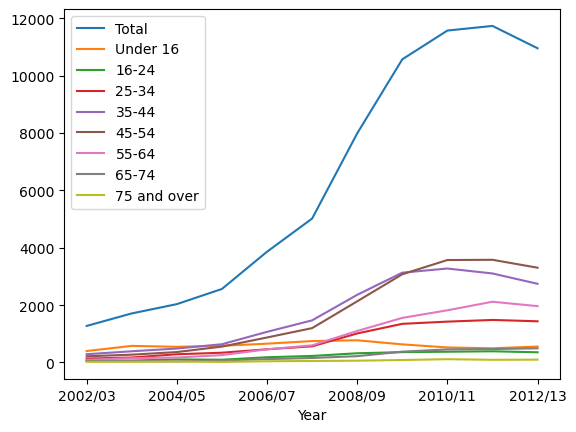

In [60]:
data_age.plot()

<AxesSubplot:xlabel='Year'>

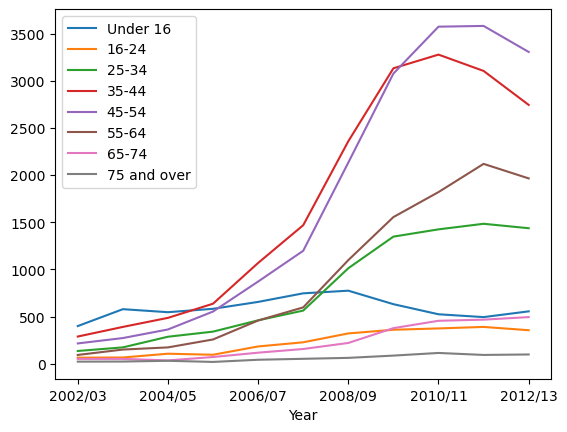

In [61]:
data_age.drop('Total',axis=1).plot()

In [62]:
data_age_minus_total = data_age.drop('Total', axis=1)

<AxesSubplot:xlabel='Year'>

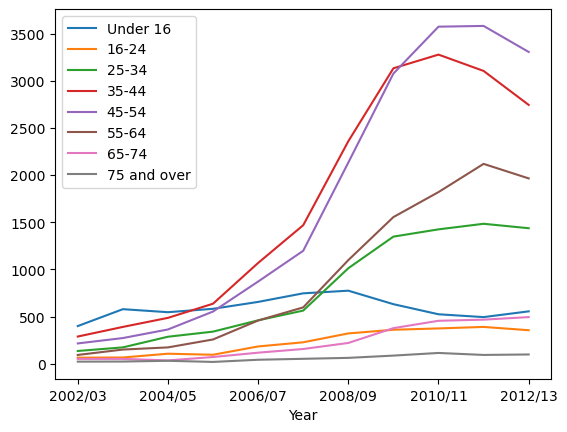

In [63]:
data_age_minus_total.plot()

<AxesSubplot:xlabel='Year'>

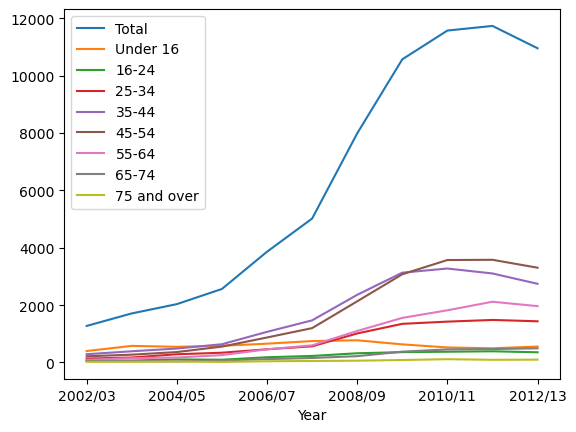

In [64]:
data_age.plot()

<AxesSubplot:xlabel='Year'>

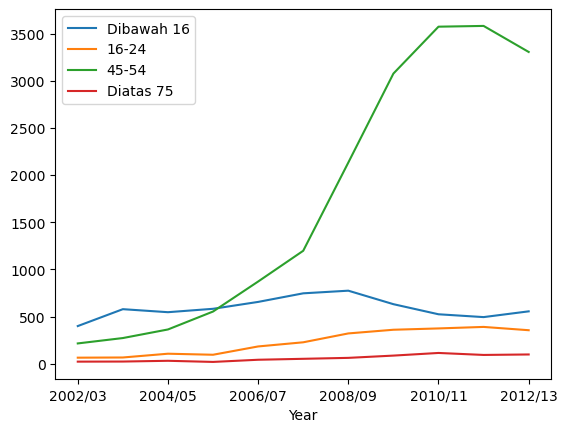

In [65]:
data_age['Under 16'].plot(label='Dibawah 16',legend=True)
data_age['16-24'].plot(label='16-24',legend=True)
data_age['45-54'].plot(label='45-54',legend=True)
data_age['75 and over'].plot(label='Diatas 75',legend=True)

DATETIME/TIME SERIES

In [66]:
from datetime import datetime

In [67]:
date_range = pd.date_range(start='1/01/2020',end='1/08/2020',freq='H')
date_range

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [68]:
169/24

7.041666666666667

In [69]:
df = pd.DataFrame(date_range,columns=['date'])
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [70]:
len(df)

169

In [71]:
df.head()

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    169 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 KB


In [73]:
df['data_range'] = np.random.randint(0,100,size=len(date_range))

In [74]:
df.set_index('date',inplace=True)
df

,data_range
date,
2020-01-01 00:00:00,73
2020-01-01 01:00:00,62
2020-01-01 02:00:00,23
2020-01-01 03:00:00,72
2020-01-01 04:00:00,57
...,...
2020-01-07 20:00:00,53
2020-01-07 21:00:00,44
2020-01-07 22:00:00,64


In [75]:
string_date_range_2 =['june-01-2020','june-02-2020','june-03-2020']
datetime.strptime('june-01-2020','%B-%d-%Y')
timestamp_date_range_2 = [datetime.strptime(x, '%B-%d-%Y') for x in string_date_range_2]
timestamp_date_range_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [76]:
string_date_range_2 =['june-01-2020','june-02-2020','june-03-2020']
print([x+'HAHA' for x in string_date_range_2]) 

['june-01-2020HAHA', 'june-02-2020HAHA', 'june-03-2020HAHA']


In [77]:
df[df.index.day==2]

,data_range
date,
2020-01-02 00:00:00,4
2020-01-02 01:00:00,48
2020-01-02 02:00:00,50
2020-01-02 03:00:00,19
2020-01-02 04:00:00,15
2020-01-02 05:00:00,76
2020-01-02 06:00:00,61
2020-01-02 07:00:00,60
2020-01-02 08:00:00,73


In [78]:
list_a = [1,2,3,4,5]
list_comp = [x**2 for x in list_a]
list_comp

[1, 4, 9, 16, 25]

In [79]:
df[df.index.year==2020]

,data_range
date,
2020-01-01 00:00:00,73
2020-01-01 01:00:00,62
2020-01-01 02:00:00,23
2020-01-01 03:00:00,72
2020-01-01 04:00:00,57
...,...
2020-01-07 20:00:00,53
2020-01-07 21:00:00,44
2020-01-07 22:00:00,64


In [80]:
df[df.index.day==6]

,data_range
date,
2020-01-06 00:00:00,52
2020-01-06 01:00:00,11
2020-01-06 02:00:00,28
2020-01-06 03:00:00,40
2020-01-06 04:00:00,0
2020-01-06 05:00:00,94
2020-01-06 06:00:00,46
2020-01-06 07:00:00,37
2020-01-06 08:00:00,12


In [81]:
df.loc['2020-01-01':'2020-01-02']

,data_range
date,
2020-01-01 00:00:00,73
2020-01-01 01:00:00,62
2020-01-01 02:00:00,23
2020-01-01 03:00:00,72
2020-01-01 04:00:00,57
2020-01-01 05:00:00,98
2020-01-01 06:00:00,5
2020-01-01 07:00:00,13
2020-01-01 08:00:00,92


In [82]:
df.loc['2020-01-01'].mean()

data_range    58.75
dtype: float64

In [83]:
df.resample('Y').mean()

,data_range
date,
2020-12-31,46.633136


In [84]:
df.resample('D').mean()

,data_range
date,
2020-01-01,58.750000
2020-01-02,41.041667
2020-01-03,48.583333
2020-01-04,42.041667
2020-01-05,46.083333
2020-01-06,38.083333
2020-01-07,52.708333
2020-01-08,26.000000


In [85]:
# rolling. melakukan sum data 3 terakhir
df.rolling(3).sum()

,data_range
date,
2020-01-01 00:00:00,NaN
2020-01-01 01:00:00,NaN
2020-01-01 02:00:00,158.0
2020-01-01 03:00:00,157.0
2020-01-01 04:00:00,152.0
...,...
2020-01-07 20:00:00,160.0
2020-01-07 21:00:00,140.0
2020-01-07 22:00:00,161.0


In [86]:
df

,data_range
date,
2020-01-01 00:00:00,73
2020-01-01 01:00:00,62
2020-01-01 02:00:00,23
2020-01-01 03:00:00,72
2020-01-01 04:00:00,57
...,...
2020-01-07 20:00:00,53
2020-01-07 21:00:00,44
2020-01-07 22:00:00,64


TIME SERIES FROM DATASET

In [87]:
opsd_daily = pd.read_csv("opsd_germany_daily.csv")

In [88]:
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [89]:
opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'])
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [90]:
opsd_daily.set_index('Date',inplace=True)

In [91]:
opsd_daily.shape

(4383, 4)

In [92]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [93]:
# tambahkan kolom
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Day'] = opsd_daily.index.weekday

In [94]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [95]:
opsd_daily.loc['2015-09':'2017-10']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day
Date,,,,,,,
2015-09-01,1454.19300,221.322,94.596,315.918,2015,9,1
2015-09-02,1431.18600,182.791,120.108,302.899,2015,9,2
2015-09-03,1424.91300,113.314,91.536,204.850,2015,9,3
2015-09-04,1398.09000,240.758,123.201,363.959,2015,9,4
2015-09-05,1188.41000,446.861,95.646,542.507,2015,9,5
...,...,...,...,...,...,...,...
2017-10-27,1480.50323,528.191,52.371,580.562,2017,10,4
2017-10-28,1284.26158,819.818,26.799,846.617,2017,10,5
2017-10-29,1176.91823,720.079,52.222,772.301,2017,10,6


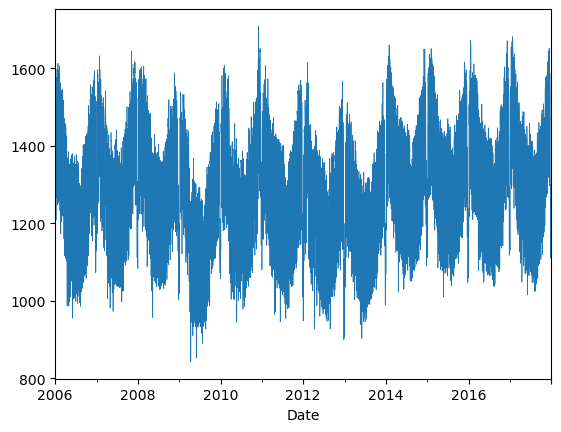

In [96]:
opsd_daily['Consumption'].plot(linewidth=0.5);

<AxesSubplot:xlabel='Date'>

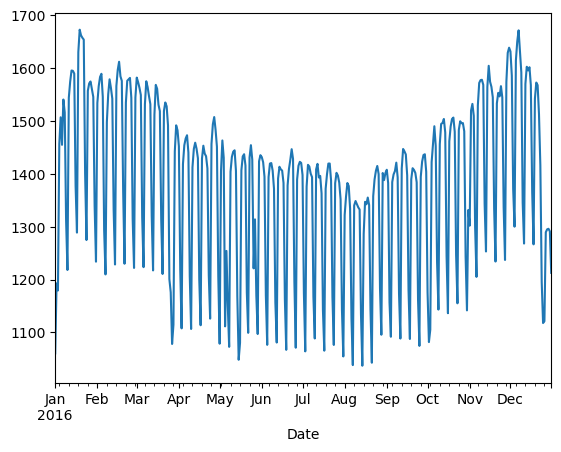

In [97]:
opsd_daily.loc['2016']['Consumption'].plot()

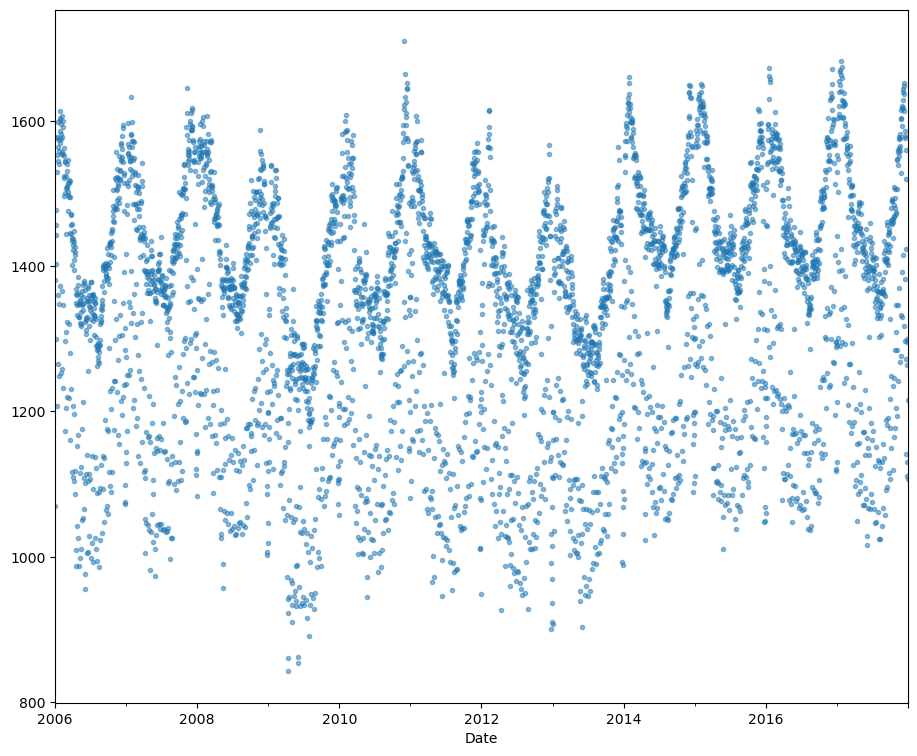

In [98]:
opsd_daily['Consumption'].plot(marker='.',alpha=0.5,linestyle='None',figsize=(11,9));

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

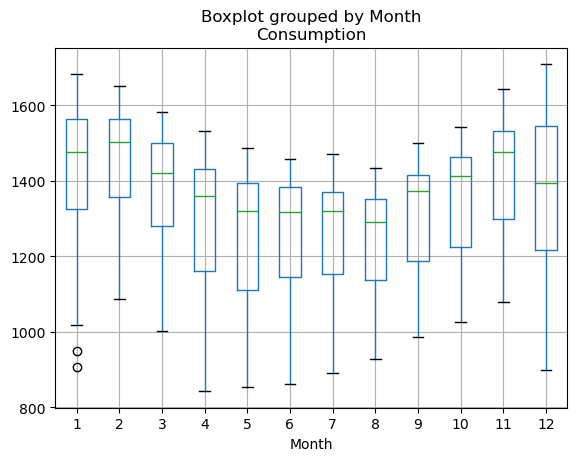

In [99]:
opsd_daily.boxplot(column=['Consumption'], by ='Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

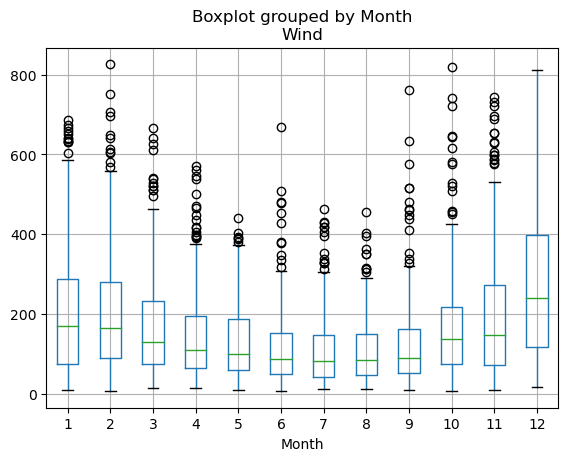

In [100]:
opsd_daily.boxplot(column=['Wind'], by ='Month')